# Evaluation Script
This notebook reads the test predictions for all models and computes their respective mean ROC AUC values at the end. 

[comment]: # ( Originally this script used `glob` to automatically grab files that fit the submission regex then run the evaluation but it seemed a little over engineered.)

In [6]:
import pandas as pd

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

test = pd.read_csv('data/test.csv')

test_random_baseline = pd.read_csv('submissions/test_random_baseline.csv')

test_naive_bayes = pd.read_csv('submissions/test_naive_bayes.csv')
test_NB_LR = pd.read_csv('submissions/test_nblr_count.csv')
test_LSTM = pd.read_csv('submissions/test_basic_LSTM.csv')
test_BiLSTM = pd.read_csv('submissions/test_bidirectional_LSTM.csv')

models = {
    "Random Baseline" : test_random_baseline,
    "Naive Bayes" : test_naive_bayes,
    "Naive Bayes + LR" : test_NB_LR,
    "Basic LSTM" : test_LSTM,
    "Bidirectional LSTM" : test_BiLSTM

}

In [7]:
from sklearn.metrics import roc_auc_score
print("--- Model ROC AUC Scores ---")
for name,prediction_df in models.items():
    print(name,roc_auc_score(test[labels], prediction_df[labels], average='weighted'))

--- Model ROC AUC Scores ---
Random Baseline 0.498028349851
Naive Bayes 0.782099894628
Naive Bayes + LR 0.946319424789
Basic LSTM 0.957314010567
Bidirectional LSTM 0.969104388096


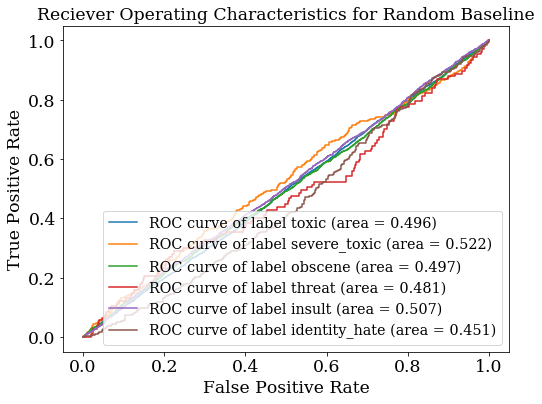

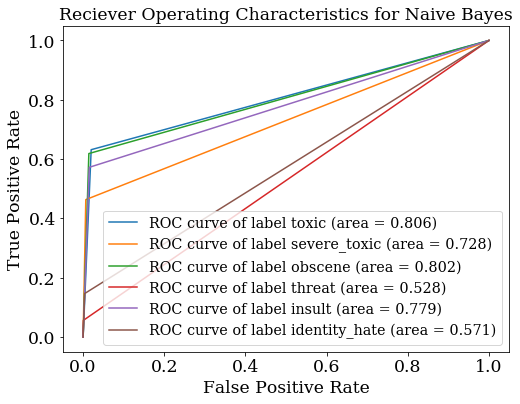

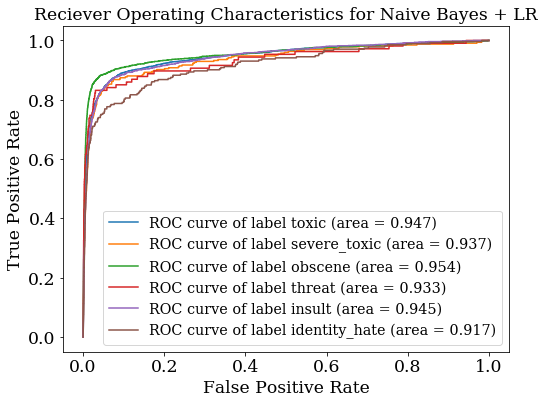

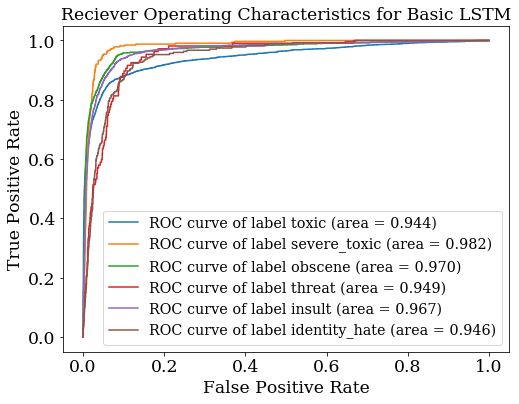

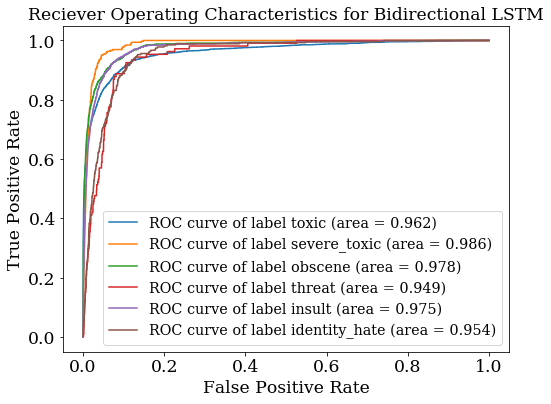

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

params = {'font.family': 'serif',
          'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

%matplotlib inline

# Create a graph for each model
i = 0
for name,prediction_df in models.items():
    
    f = plt.figure(figsize=(8, 6))
    
    # Create a line for each label's ROC
    for label in labels:
        fpr, tpr, thresholds = roc_curve(test[label], prediction_df[label])
        label_roc_auc = auc(fpr, tpr)
        graph_label = 'ROC curve of label {0} (area = {1:0.3f})'.format(label, label_roc_auc)
        plt.plot(fpr, tpr, label = graph_label)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('Reciever Operating Characteristics for {}'.format(name))
    plt.legend(loc="lower right")
    plt.show()
    f.savefig("visuals/" + str(i) + ".pdf")
    i += 1